In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import tensorflow as tf
from tensorflow import keras

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# Set the directory paths
train_dir = '/Users/arhatshah/Documents/Textbooks and Materials/homework/sem6/ML/Alzheimer_s Dataset/train'
test_dir = '/Users/arhatshah/Documents/Textbooks and Materials/homework/sem6/ML/Alzheimer_s Dataset/test'


# Create the image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# Load the test data
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# Get the number of classes
num_classes = len(train_generator.class_indices)

# Print the number of samples and classes
print(f"Found {len(train_generator)} training images belonging to {num_classes} classes.")
print(f"Found {len(test_generator)} test images belonging to {num_classes} classes.")

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Found 161 training images belonging to 4 classes.
Found 40 test images belonging to 4 classes.


IndexError: index 32 is out of bounds for axis 0 with size 32

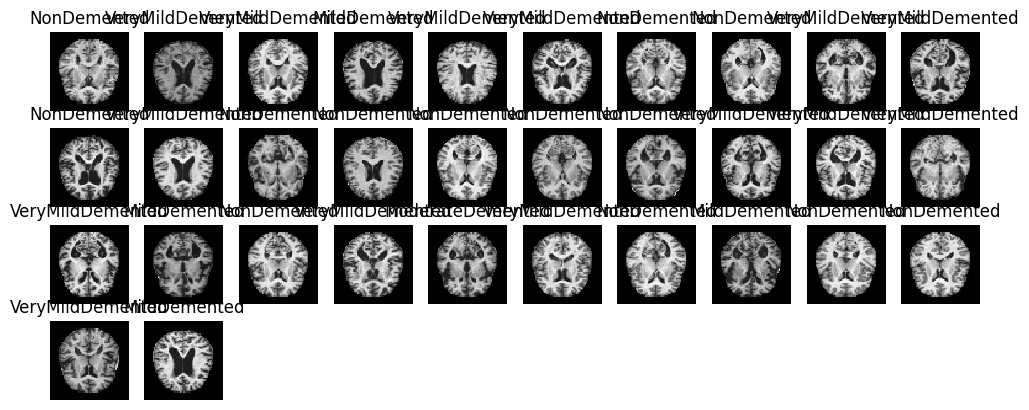

In [12]:
class_names = list(train_generator.class_indices.keys())

# Display some sample images with their labels
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for i in range(n_rows * n_cols):
    images, labels = next(train_generator)
    image, label = images[i], labels[i]
    
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[label.argmax()], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [13]:
##Problem 1

In [15]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Assuming your input images are 64x64 pixels with 3 color channels
input_shape = (64, 64, 3)

# Define the model architecture
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/10
161/161 [==============================] - 4s 23ms/step - loss: 1.1015 - accuracy: 0.5101 - val_loss: 1.0932 - val_accuracy: 0.5238
Epoch 2/10
161/161 [==============================] - 3s 16ms/step - loss: 0.8914 - accuracy: 0.5821 - val_loss: 1.1817 - val_accuracy: 0.5145
Epoch 3/10
161/161 [==============================] - 3s 19ms/step - loss: 0.8339 - accuracy: 0.6098 - val_loss: 0.9948 - val_accuracy: 0.4973
Epoch 4/10
161/161 [==============================] - 3s 16ms/step - loss: 0.7869 - accuracy: 0.6423 - val_loss: 1.4481 - val_accuracy: 0.5059
Epoch 5/10
161/161 [==============================] - 3s 19ms/step - loss: 0.7132 - accuracy: 0.6821 - val_loss: 1.5610 - val_accuracy: 0.5285
Epoch 6/10
161/161 [==============================] - 4s 22ms/step - loss: 0.7336 - accuracy: 0.6895 - val_loss: 1.6309 - val_accuracy: 0.5387
Epoch 7/10
161/161 [==============================] - 3s 19ms/step - loss: 0.6184 - accuracy: 0.7376 - val_loss: 1.1640 - val_accuracy: 0.5575

In [ ]:
#Problem 2

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming your input images are 64x64 pixels with 3 color channels
input_shape = (64, 64, 3)

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
161/161 [==============================] - 16s 100ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 1.9778 - val_accuracy: 0.6630
Epoch 2/10
161/161 [==============================] - 15s 91ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 1.9787 - val_accuracy: 0.6763
Epoch 3/10
161/161 [==============================] - 14s 85ms/step - loss: 3.4023e-04 - accuracy: 1.0000 - val_loss: 2.0703 - val_accuracy: 0.6747
Epoch 4/10
161/161 [==============================] - 14s 87ms/step - loss: 2.1441e-04 - accuracy: 1.0000 - val_loss: 2.1183 - val_accuracy: 0.6740
Epoch 5/10
161/161 [==============================] - 14s 85ms/step - loss: 1.6763e-04 - accuracy: 1.0000 - val_loss: 2.1817 - val_accuracy: 0.6755
Epoch 6/10
161/161 [==============================] - 14s 84ms/step - loss: 1.3704e-04 - accuracy: 1.0000 - val_loss: 2.2135 - val_accuracy: 0.6740
Epoch 7/10
161/161 [==============================] - 14s 84ms/step - loss: 1.1501e-04 - accuracy: 1.0000 - val_loss: 2

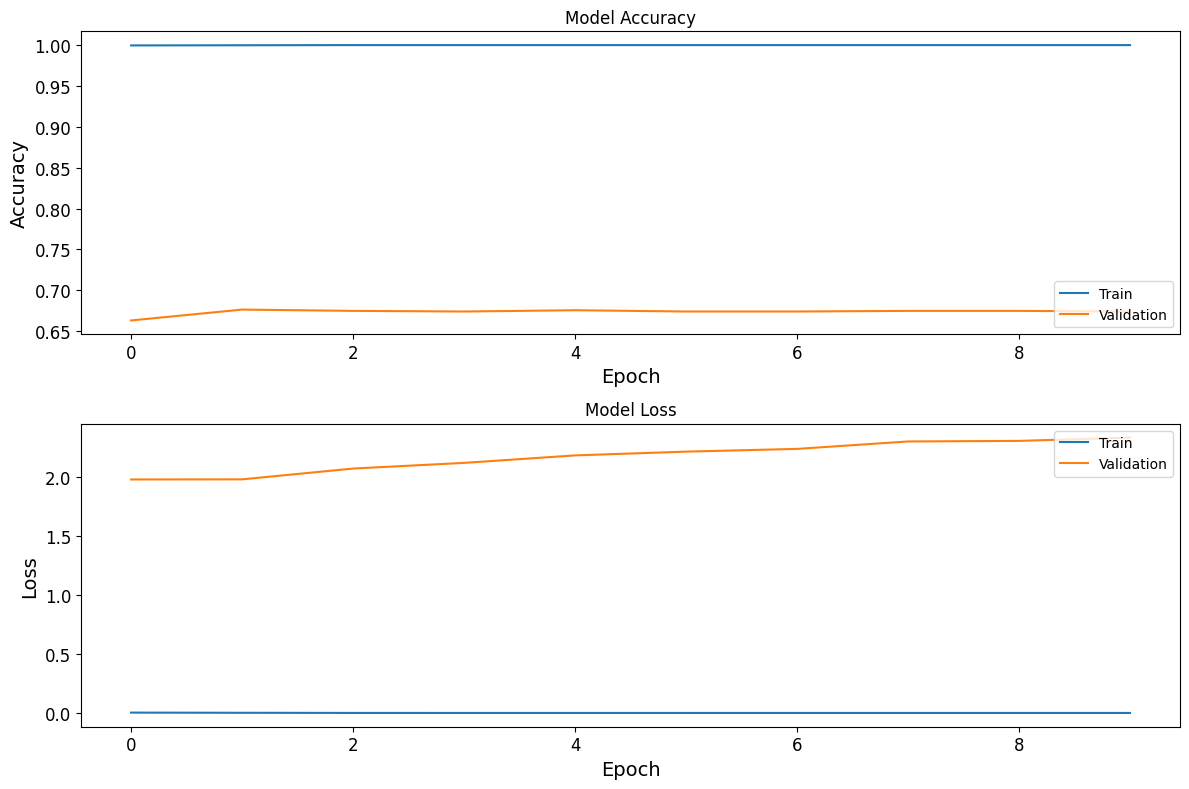

In [19]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Plotting the metrics
fig = plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [20]:
#problem 3

In [22]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set the directory paths
train_dir = '/Users/arhatshah/Documents/Textbooks and Materials/homework/sem6/ML/Alzheimer_s Dataset/train'
test_dir = '/Users/arhatshah/Documents/Textbooks and Materials/homework/sem6/ML/Alzheimer_s Dataset/test'


# Create the image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# Load the test data
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')


# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Epoch 1/10
161/161 [==============================] - 120s 744ms/step - loss: 1.0986 - accuracy: 0.4706 - val_loss: 0.9640 - val_accuracy: 0.5043
Epoch 2/10
161/161 [==============================] - 117s 728ms/step - loss: 0.9896 - accuracy: 0.5132 - val_loss: 0.9812 - val_accuracy: 0.5121
Epoch 3/10
161/161 [==============================] - 116s 722ms/step - loss: 0.9699 - accuracy: 0.5272 - val_loss: 1.0025 - val_accuracy: 0.5231
Epoch 4/10
161/161 [==============================] - 118s 734ms/step - loss: 0.9614 - accuracy: 0.5349 - val_loss: 0.9500 - val_accuracy: 0.5223
Epoch 5/10
161/161 [==============================] - 117s 727ms/step - loss: 0.9468 - accuracy: 0.5337 - val_loss: 0.9508 - val_accuracy: 0.5168
Epoch 6/10
161/161 [==============================] - 119s 738ms/step - loss: 0.9265 - accuracy: 0.5520 - val_loss: 1.0059 - val_accuracy: 0.5309
Epoch 7/10
161/161 [====================